# 🗺️ Urban Inequality Map of Hyderabad  
**Created by:** [Rasmitha Reddy Mundla]

---

## 📌 Objective  
Visualize how social indicators like **Scheduled Caste (%)** vary by ward in Hyderabad using choropleth maps. The project combines:

- **KML data** (ward boundaries)  
- **CSV data** (ward-level indicators)  
- **Python + GeoPandas** for mapping
"""

display(Markdown(text))

In [1]:
# Import required libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the KML file from the "data" folder
wards = gpd.read_file("data/ghmc-wards.kml")

# Check if it loaded correctly
print(wards.head())

                     Name description timestamp begin end altitudeMode  \
0     Ward 91 Khairatabad        None       NaT   NaT NaT         None   
1     Ward 105 Gachibowli        None       NaT   NaT NaT         None   
2  Ward 60 Rajendra Nagar        None       NaT   NaT NaT         None   
3   Ward 95 Jubilee Hills        None       NaT   NaT NaT         None   
4         Ward 6 Nacharam        None       NaT   NaT NaT         None   

   tessellate  extrude  visibility  drawOrder  ...               _id  \
0          -1        0          -1        NaN  ...  relation/7848799   
1          -1        0          -1        NaN  ...  relation/7848824   
2          -1        0          -1        NaN  ...  relation/7848844   
3          -1        0          -1        NaN  ...  relation/7848859   
4          -1        0          -1        NaN  ...  relation/7849315   

  admin_level        boundary      type            _timestamp _version  \
0          10  administrative  boundary  2017-12

# 📍 Step 1: Load Ward Boundary Data (KML)

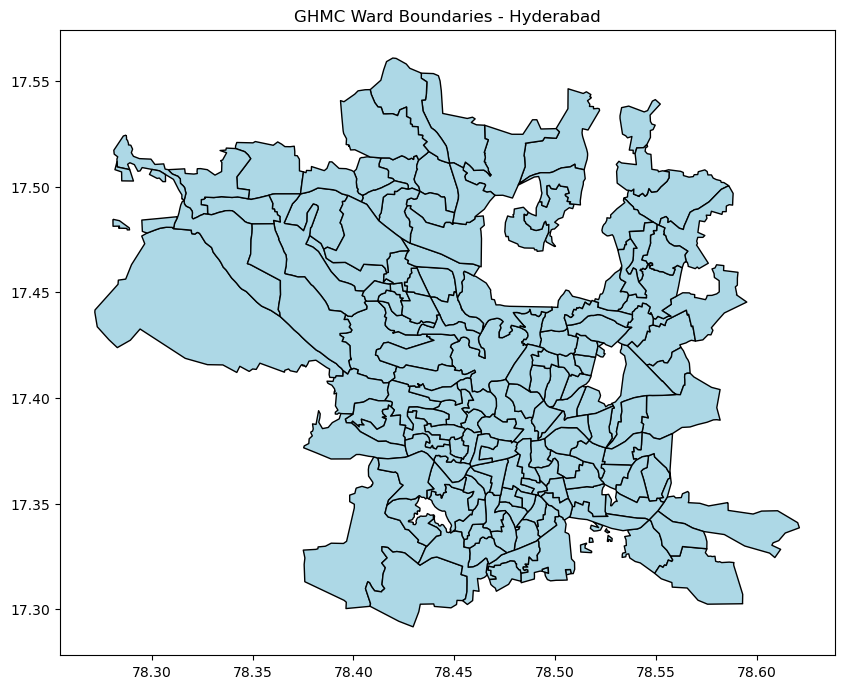

In [3]:
# Convert to standard lat/lon format
wards = wards.to_crs(epsg=4326)

# Plot the ward boundaries
wards.plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.title("GHMC Ward Boundaries - Hyderabad")
plt.show()

In [21]:
import os

# List files in the data folder
os.listdir("data/")


['ghmc-wards.kml', 'hyderabad_census_wards.csv', 'hyd_census_ward_data.csv']

# 🧾 Step 2: Load Census Data

In [23]:
import pandas as pd

# Load the correct file
census = pd.read_csv("data/hyderabad_census_wards.csv")

# Preview the data
census.head()

,DISTRICT_CODE,DIVISION_CODE,DIVISION_NAME,Name_District,Mandal_Code,Name_Mandal,Village_Code,Ward,Level1,VName,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,22,92,Secunderabad,Hyderabad,6,Musheerabad,573968,1,WARD,Osmania University (CT) WARD NO.-0001,...,0,2,1,1,23,21,2,5887,3047,2840
1,22,92,Secunderabad,Hyderabad,4,Tirumalgiri,802919,1,WARD,Secunderabad (CB) WARD NO.-0001,...,0,47,37,10,172,125,47,18443,6738,11705
2,22,92,Secunderabad,Hyderabad,4,Tirumalgiri,802919,2,WARD,Secunderabad (CB) WARD NO.-0002,...,1,79,36,43,885,613,272,19006,7128,11878
3,22,92,Secunderabad,Hyderabad,4,Tirumalgiri,802919,3,WARD,Secunderabad (CB) WARD NO.-0003,...,1,17,4,13,79,46,33,13648,5179,8469
4,22,92,Secunderabad,Hyderabad,4,Tirumalgiri,802919,4,WARD,Secunderabad (CB) WARD NO.-0004,...,1,5,2,3,126,77,49,12094,4459,7635


In [25]:
# Show summary info of the dataset
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DISTRICT_CODE   108 non-null    int64 
 1   DIVISION_CODE   108 non-null    int64 
 2   DIVISION_NAME   108 non-null    object
 3   Name_District   108 non-null    object
 4   Mandal_Code     108 non-null    int64 
 5   Name_Mandal     108 non-null    object
 6   Village_Code    108 non-null    int64 
 7   Ward            108 non-null    int64 
 8   Level1          108 non-null    object
 9   VName           108 non-null    object
 10  TRU             108 non-null    object
 11  No_HH           108 non-null    int64 
 12  TOT_P           108 non-null    int64 
 13  TOT_M           108 non-null    int64 
 14  TOT_F           108 non-null    int64 
 15  P_06            108 non-null    int64 
 16  M_06            108 non-null    int64 
 17  F_06            108 non-null    int64 
 18  P_SC      

# 🔁 Step 3: Merge Datasets

In [27]:
print(wards.columns)  # Columns in your GeoDataFrame
print(census.columns) # Columns in your census DataFrame

Index(['ward_name', 'description', 'timestamp', 'begin', 'end', 'altitudeMode',
       'tessellate', 'extrude', 'visibility', 'drawOrder', 'icon', '_id',
       'admin_level', 'boundary', 'type', '_timestamp', '_version',
       '_changeset', '_user', '_uid', 'geometry'],
      dtype='object')
Index(['DISTRICT_CODE', 'DIVISION_CODE', 'DIVISION_NAME', 'Name_District',
       'Mandal_Code', 'Name_Mandal', 'Village_Code', 'Ward', 'Level1', 'VName',
       'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06',
       'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST', 'P_LIT', 'M_LIT',
       'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL', 'TOT_WORK_P', 'TOT_WORK_M',
       'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_P',
       'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M',
       'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P',
       'MARG_CL_M', 'MARG_CL_F', 'MAR

In [37]:
print(wards.columns)

Index(['ward_name', 'description', 'timestamp', 'begin', 'end', 'altitudeMode',
       'tessellate', 'extrude', 'visibility', 'drawOrder', 'icon', '_id',
       'admin_level', 'boundary', 'type', '_timestamp', '_version',
       '_changeset', '_user', '_uid', 'geometry'],
      dtype='object')


# 🗺️ Step 4: Plot SC Population (%)

In [39]:
print(census.columns)

Index(['DISTRICT_CODE', 'DIVISION_CODE', 'DIVISION_NAME', 'Name_District',
       'Mandal_Code', 'Name_Mandal', 'Village_Code', 'Ward', 'Level1', 'VName',
       'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06',
       'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST', 'P_LIT', 'M_LIT',
       'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL', 'TOT_WORK_P', 'TOT_WORK_M',
       'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_P',
       'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M',
       'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P',
       'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_P', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_P', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_P', 'MARG_OT_M',
       'MARG_OT_F', 'MARGWORK_3_6_P', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_P', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_P',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F'

In [41]:
census = census.rename(columns={"Ward": "ward_name"})

# 🔍 Step 5: Future Work (Add Hospitals, Schools from OSM)

In [45]:
wards['ward_name'] = wards['ward_name'].astype(str).str.strip().str.lower()
census['ward_name'] = census['ward_name'].astype(str).str.strip().str.lower()

In [47]:
merged = wards.merge(census, on='ward_name', how='left')

In [51]:
import osmnx as ox
print(ox.__version__)

2.0.2


In [53]:
pip install --upgrade osmnx


  Attempting uninstall: osmnx
    Found existing installation: osmnx 2.0.2
    Uninstalling osmnx-2.0.2:
      Successfully uninstalled osmnx-2.0.2


In [65]:
print(dir(ox))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_errors', '_http', '_nominatim', '_osm_xml', '_overpass', '_version', 'add_edge_bearings', 'add_edge_grades', 'add_edge_speeds', 'add_edge_travel_times', 'add_node_elevations_google', 'add_node_elevations_raster', 'basic_stats', 'bearing', 'citation', 'consolidate_intersections', 'convert', 'distance', 'elevation', 'features', 'features_from_address', 'features_from_bbox', 'features_from_place', 'features_from_point', 'features_from_polygon', 'features_from_xml', 'geocode', 'geocode_to_gdf', 'geocoder', 'graph', 'graph_from_address', 'graph_from_bbox', 'graph_from_gdfs', 'graph_from_place', 'graph_from_point', 'graph_from_polygon', 'graph_from_xml', 'graph_to_gdfs', 'io', 'k_shortest_paths', 'load_graphml', 'log', 'nearest_edges', 'nearest_nodes', 'orientation_entropy', 'plot', 'plot_figure_ground', 'plot_footprints', 'plot_graph', 'plot_graph_route', '

In [67]:
print(ox.__version__)


2.0.2


In [69]:
import osmnx as ox

place_name = "Hyderabad, India"
tags = {"amenity": "hospital"}

hospitals = ox.features_from_place(place_name, tags=tags)

# Convert to WGS84 if needed
hospitals = hospitals.to_crs(epsg=4326)[['geometry']]


In [71]:
parks = ox.features_from_place(place_name, tags={"leisure": "park"})

In [73]:
import folium

# If not already done, calculate SC percentage
merged["sc_percent"] = (merged["P_SC"] / merged["TOT_P"]) * 100

# Create base map centered on Hyderabad
m = folium.Map(location=[17.385, 78.4867], zoom_start=11)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged.to_json(),  # Ensure GeoJSON format
    data=merged,
    columns=["ward_name", "sc_percent"],
    key_on="feature.properties.ward_name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="SC Population (%)"
).add_to(m)

# Add hospital points
for _, row in hospitals.iterrows():
    if row.geometry.geom_type == 'Point':
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=4,
            color="blue",
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

# Display the map
m

In [75]:
m.save("hyderabad_inequality_map.html")

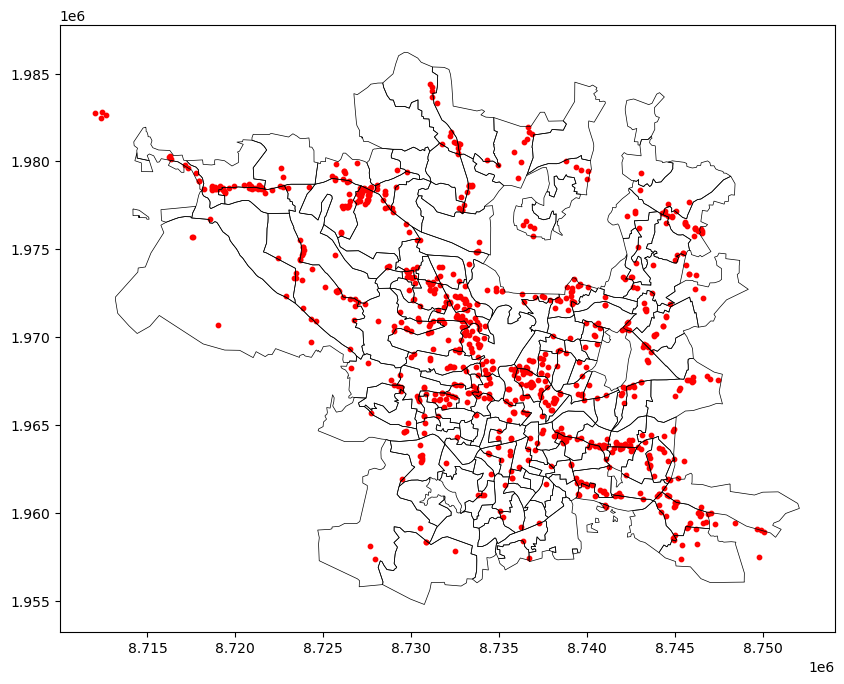

In [163]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
wards.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
hospitals.plot(ax=ax, color='red', markersize=10)
plt.show()

In [187]:
wards['min_hospital_dist_m'] = wards.geometry.apply(lambda ward_geom: hospitals.geometry.distance(ward_geom).min())

In [189]:
# Calculate minimum distance from each ward polygon to all hospital points
wards['min_hospital_dist_m'] = wards.geometry.apply(lambda ward_geom: hospitals.geometry.distance(ward_geom).min())

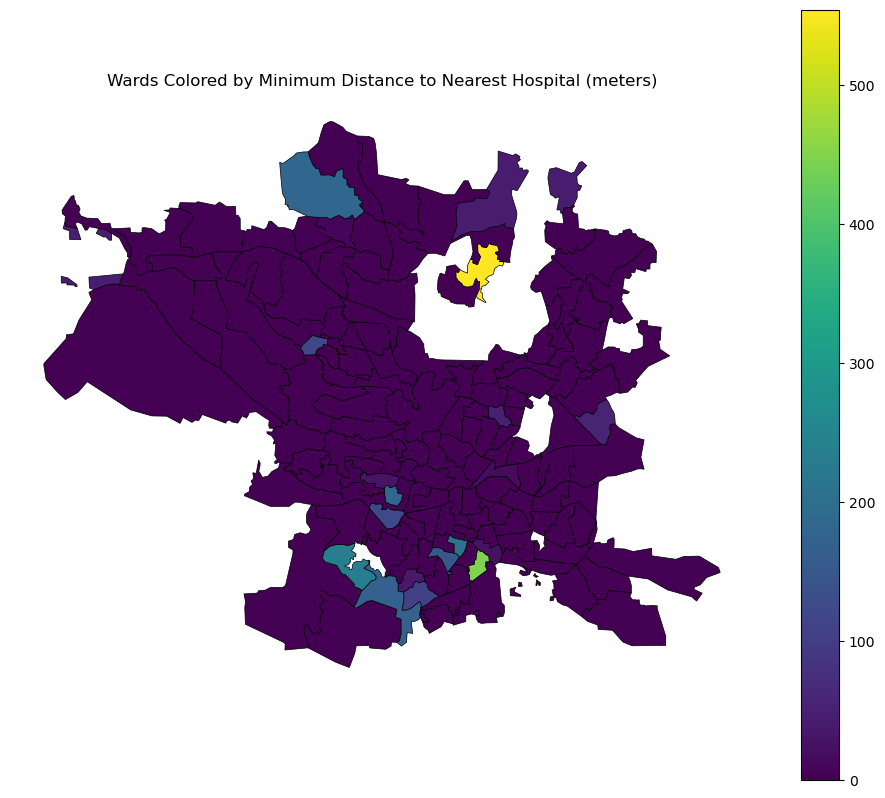

In [191]:
import matplotlib.pyplot as plt

# Plot wards colored by distance to nearest hospital
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

wards.plot(column='min_hospital_dist_m',
           cmap='viridis',
           legend=True,
           edgecolor='black',
           linewidth=0.5,
           ax=ax)

ax.set_title('Wards Colored by Minimum Distance to Nearest Hospital (meters)')
ax.set_axis_off()
plt.show()

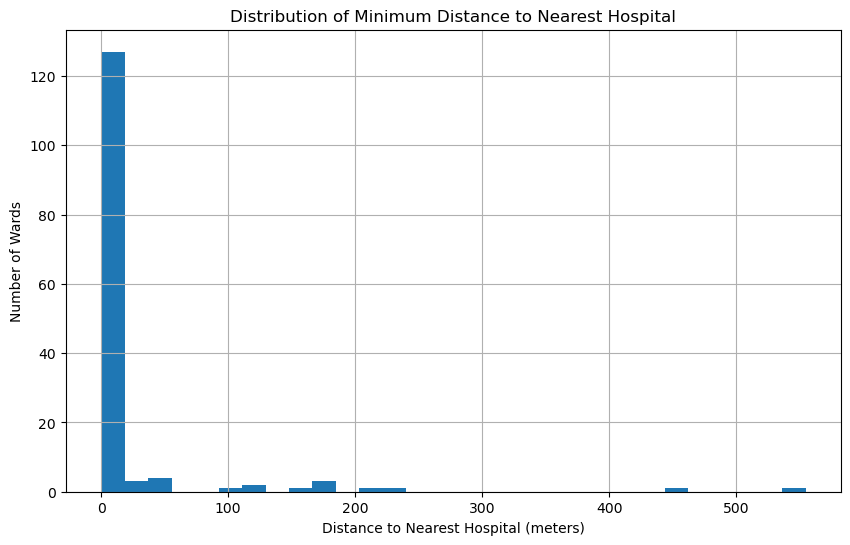

In [193]:
wards['min_hospital_dist_m'].hist(bins=30, figsize=(10, 6))
plt.xlabel('Distance to Nearest Hospital (meters)')
plt.ylabel('Number of Wards')
plt.title('Distribution of Minimum Distance to Nearest Hospital')
plt.show()

In [195]:
print("Distance to nearest hospital (meters) statistics:")
print(wards['min_hospital_dist_m'].describe())

Distance to nearest hospital (meters) statistics:
count    145.000000
mean      19.220359
std       70.902654
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      554.584990
Name: min_hospital_dist_m, dtype: float64


In [197]:
far_wards = wards[wards['min_hospital_dist_m'] > 500]
print(f"Number of wards more than 500m from hospital: {len(far_wards)}")
print(far_wards[['ward_name', 'min_hospital_dist_m']])

Number of wards more than 500m from hospital: 1
                ward_name  min_hospital_dist_m
99  ward 135 venkatapuram            554.58499


In [13]:
pip install geopandas fiona lxml

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.5 MB 10.0 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.5 MB 4.9 MB/s eta 0:00:05
   ------- -------------------------------- 4.7/24.5 MB 7.7 MB/s eta 0:00:03
   -------- ------------------------------- 5.2/24.5 MB 8.0 MB/s eta 0:00:03
   ------------ --------------------------- 7.3/24.5 MB 7.2 MB/s eta 0:00:03
   ------------ --------------------------- 7.3/24.5 MB 7.2 MB/s eta 0:00:03
   ------------ --------------------------- 7.3/24.5 MB 7.2 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.5 MB 5.7 MB/s eta 0:00:03
   -------------------- ------------------- 12.3/24.5 MB 6.6 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 6.8 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.5 MB 6.6 MB/s eta 0:00:02
   ------------------------- -------------- 15.7/24.5 MB 6.7 MB/s eta 0:00:02
 

In [17]:
import geopandas as gpd

# Raw string to avoid unicode escape issues
kml_path = r"C:\Users\RASMITHA\Urban Inequality Map of Hyderabad\data\ghmc-wards.kml"

# List layers in the KML
import fiona
layers = fiona.listlayers(kml_path)
print(layers)  # Will show available layers — usually ['doc.kml', 'Placemarks', etc.]

['overpass-turbo.eu export']


In [19]:
wards = gpd.read_file(kml_path, driver='KML', layer=layers[0])  # Replace with correct layer if needed
print(wards.head())

                     Name description timestamp begin end altitudeMode  \
0     Ward 91 Khairatabad        None       NaT   NaT NaT         None   
1     Ward 105 Gachibowli        None       NaT   NaT NaT         None   
2  Ward 60 Rajendra Nagar        None       NaT   NaT NaT         None   
3   Ward 95 Jubilee Hills        None       NaT   NaT NaT         None   
4         Ward 6 Nacharam        None       NaT   NaT NaT         None   

   tessellate  extrude  visibility  drawOrder  ...               _id  \
0          -1        0          -1        NaN  ...  relation/7848799   
1          -1        0          -1        NaN  ...  relation/7848824   
2          -1        0          -1        NaN  ...  relation/7848844   
3          -1        0          -1        NaN  ...  relation/7848859   
4          -1        0          -1        NaN  ...  relation/7849315   

  admin_level        boundary      type            _timestamp _version  \
0          10  administrative  boundary  2017-12

In [25]:
import os

folder_path = r"C:\Users\RASMITHA\Urban Inequality Map of Hyderabad\data"
for file in os.listdir(folder_path):
    if file.lower().endswith('.kml'):
        print("Found KML file:", file)

Found KML file: ghmc-wards.kml


In [27]:
kml_path = os.path.join(folder_path, "ghmc-wards.kml")

Available KML layers: ['overpass-turbo.eu export']
                     Name Ward    TOT_P
0     Ward 91 Khairatabad   91  28426.0
1     Ward 105 Gachibowli  105  69177.0
2  Ward 60 Rajendra Nagar  NaN      NaN
3   Ward 95 Jubilee Hills   95  32690.0
4         Ward 6 Nacharam    6  27522.0


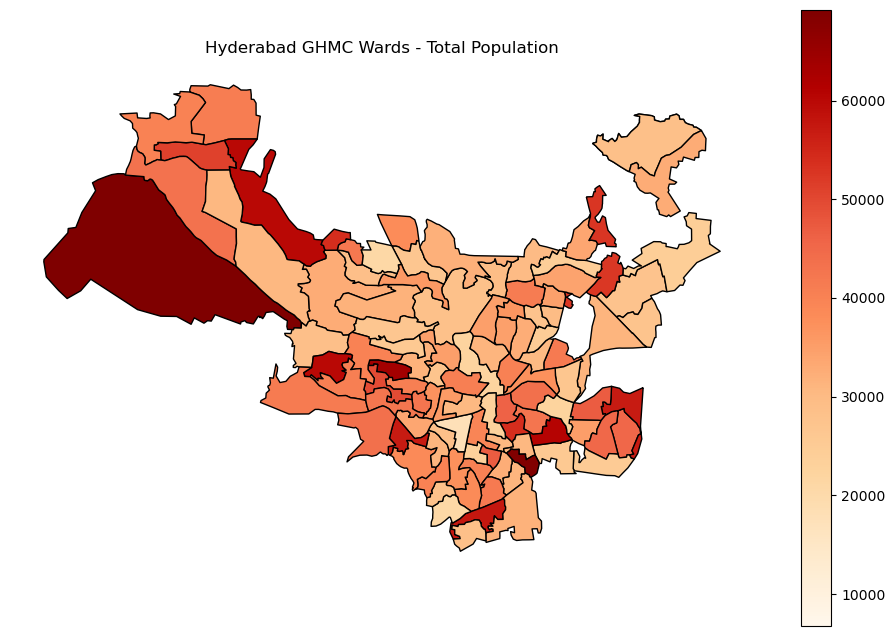

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import fiona

# Correct file paths
folder = r"C:\Users\RASMITHA\Urban Inequality Map of Hyderabad\data"
kml_path = os.path.join(folder, "ghmc-wards.kml")
csv_path = os.path.join(folder, "hyderabad_census_wards.csv")

# Confirm files exist
assert os.path.exists(kml_path), f"KML file not found at: {kml_path}"
assert os.path.exists(csv_path), f"CSV file not found at: {csv_path}"

# Check available layers in the KML
layers = fiona.listlayers(kml_path)
print("Available KML layers:", layers)

# Read the first layer (or use the correct one if needed)
wards = gpd.read_file(kml_path, driver='KML', layer=layers[0])

# Read the census CSV
census = pd.read_csv(csv_path)

# Extract ward number from 'Name' like "Ward 105 Gachibowli"
wards['Ward_num'] = wards['Name'].str.extract(r'Ward\s*(\d+)')
wards['Ward_num'] = wards['Ward_num'].astype(str)
census['Ward'] = census['Ward'].astype(str)

# Merge on ward number
merged = wards.merge(census, left_on='Ward_num', right_on='Ward', how='left')

# Check merged result
print(merged[['Name', 'Ward', 'TOT_P']].head())

# Plot
merged.plot(column='TOT_P', cmap='OrRd', legend=True, figsize=(12, 8), edgecolor='black')
plt.title("Hyderabad GHMC Wards - Total Population")
plt.axis('off')
plt.show()

In [31]:
print(sorted(wards['Ward_num'].unique()))
print(sorted(census['Ward'].unique()))

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
['1', '100', '102', '103', '104', '105', '106', '107', '108', '109', '110', '140', '141', '1

In [33]:
merged = wards.merge(census, left_on='Ward_num', right_on='Ward', how='left')

In [35]:
print("Missing population data:", merged['TOT_P'].isna().sum())

Missing population data: 40


In [37]:
print(wards[wards.is_empty])
print(wards[~wards.is_valid])

Empty GeoDataFrame
Columns: [Name, description, timestamp, begin, end, altitudeMode, tessellate, extrude, visibility, drawOrder, icon, _id, admin_level, boundary, type, _timestamp, _version, _changeset, _user, _uid, geometry, Ward_num]
Index: []

[0 rows x 22 columns]
Empty GeoDataFrame
Columns: [Name, description, timestamp, begin, end, altitudeMode, tessellate, extrude, visibility, drawOrder, icon, _id, admin_level, boundary, type, _timestamp, _version, _changeset, _user, _uid, geometry, Ward_num]
Index: []

[0 rows x 22 columns]


In [39]:
wards['geometry'] = wards['geometry'].buffer(0)

In [45]:
wards_set = set(wards['Ward_num'].astype(str))
census_set = set(census['Ward'].astype(str))
missing_in_census = wards_set - census_set
print(sorted(missing_in_census))

['10', '101', '111', '112', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '15', '16', '17', '57', '58', '59', '60', '9']


In [49]:
wards_set = set(wards['Ward_num'].astype(str))
census_set = set(census['Ward'].astype(str))

missing_in_census = wards_set - census_set
missing_in_wards = census_set - wards_set

print("Wards in wards.geojson but NOT in census:", sorted(missing_in_census))
print("Wards in census but NOT in wards.geojson:", sorted(missing_in_wards))

Wards in wards.geojson but NOT in census: ['10', '101', '111', '112', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '15', '16', '17', '57', '58', '59', '60', '9']
Wards in census but NOT in wards.geojson: ['3', '31', '4']


In [51]:
census = census[census['Ward'].astype(str).isin(wards['Ward_num'].astype(str))]

In [53]:
merged = wards.merge(census, left_on='Ward_num', right_on='Ward', how='left')
merged['TOT_P'] = merged['TOT_P'].fillna(0)  # or fillna(merged['TOT_P'].mean())

<Axes: >

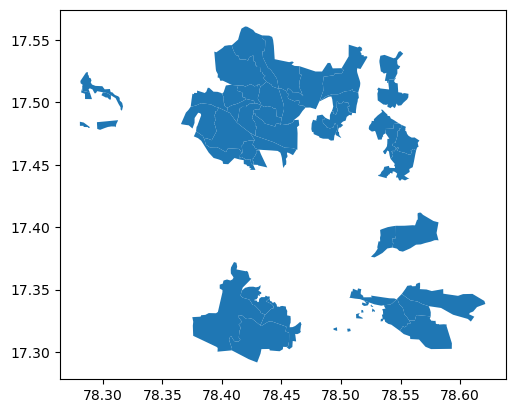

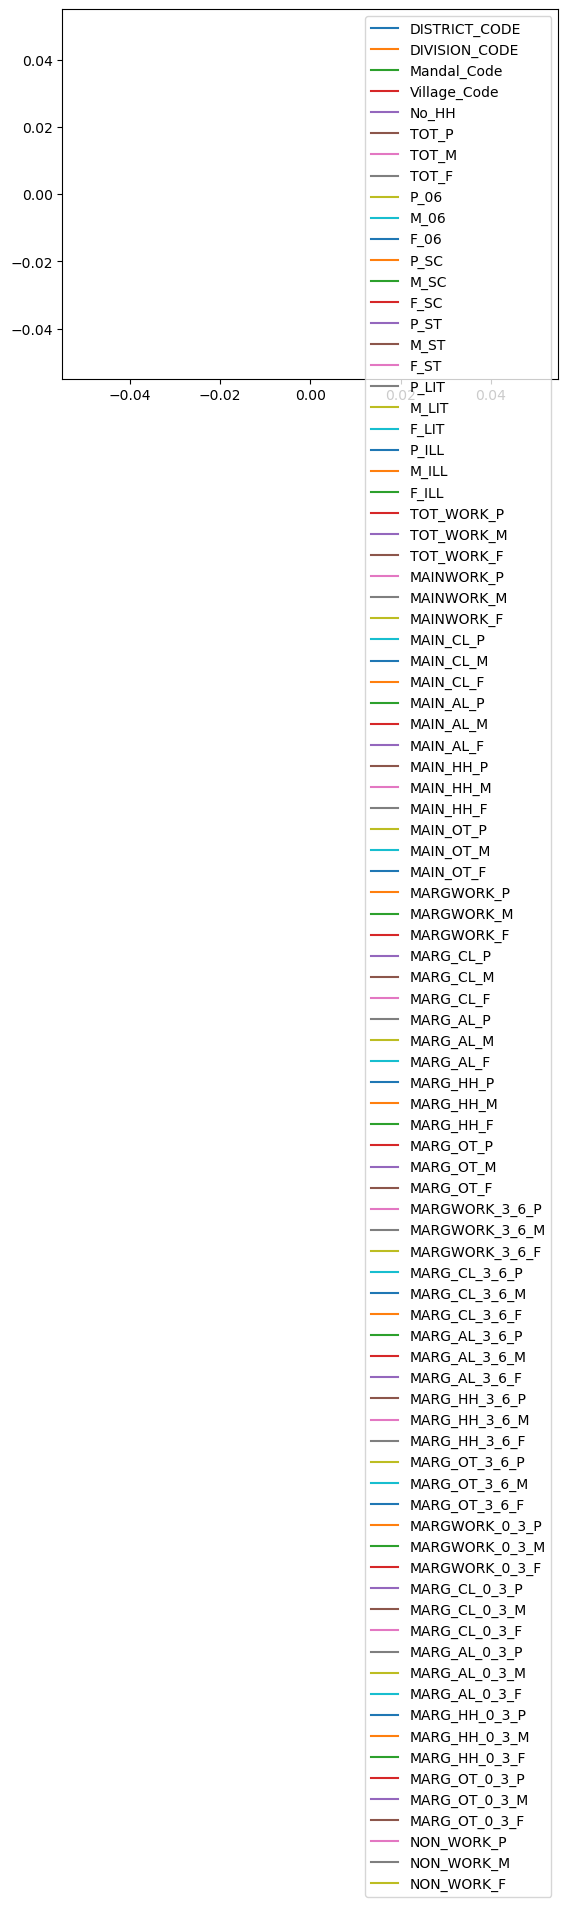

In [55]:
missing_in_census = wards[~wards['Ward_num'].astype(str).isin(census['Ward'].astype(str))]
missing_in_wards = census[~census['Ward'].astype(str).isin(wards['Ward_num'].astype(str))]

missing_in_census.plot()
missing_in_wards.plot()

In [57]:
import geopandas as gpd
import pandas as pd

# Assuming your data is loaded as:
# wards = gpd.read_file('wards.geojson') or your KML
# census = pd.read_csv('population.csv')

# Convert ward IDs to strings (if not already)
wards['Ward_num'] = wards['Ward_num'].astype(str)
census['Ward'] = census['Ward'].astype(str)

# Filter census data to only wards present in wards GeoDataFrame
census_filtered = census[census['Ward'].isin(wards['Ward_num'])]

# Merge wards with filtered census data (left join to keep all wards)
merged = wards.merge(census_filtered, left_on='Ward_num', right_on='Ward', how='left')

# Fill missing population values with 0 or mean (choose one)
merged['TOT_P'] = merged['TOT_P'].fillna(0)
# OR
# merged['TOT_P'] = merged['TOT_P'].fillna(merged['TOT_P'].mean())

# Check how many missing population values remain (should be zero now)
print("Missing population data after fill:", merged['TOT_P'].isna().sum())

# Now merged GeoDataFrame is ready for plotting choropleth without missing data gaps

Missing population data after fill: 0


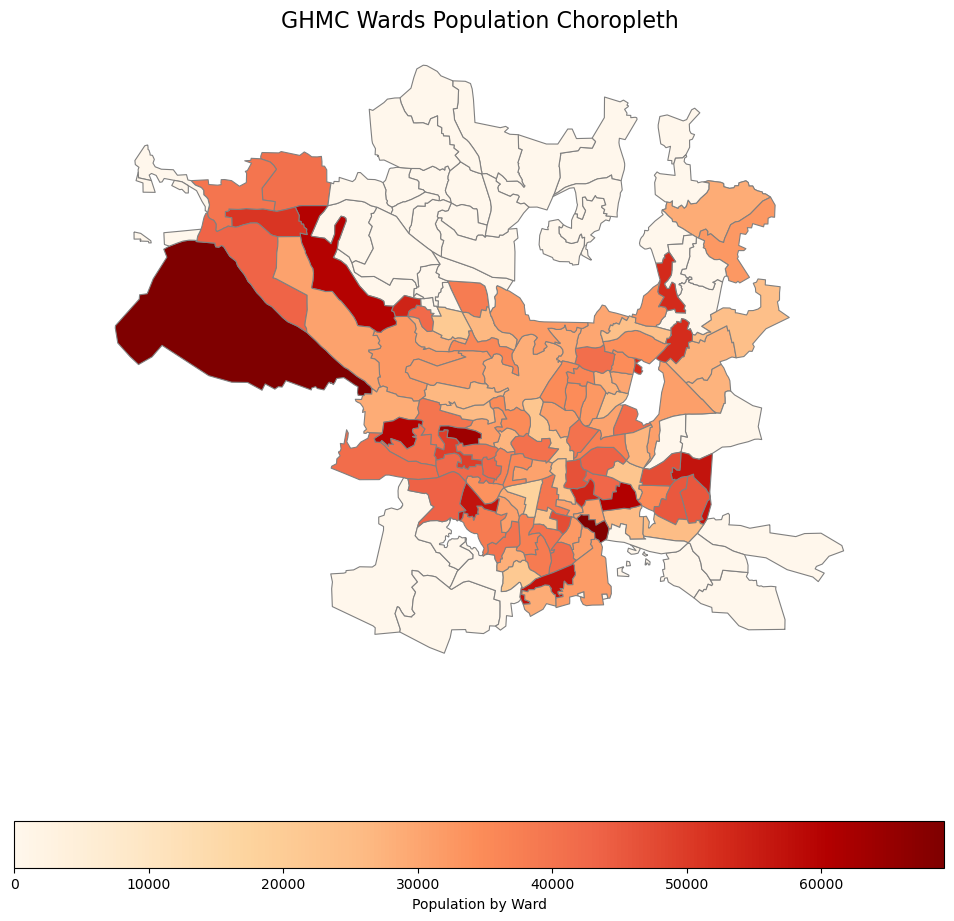

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot wards colored by population
merged.plot(column='TOT_P',
            cmap='OrRd',
            linewidth=0.8,
            edgecolor='gray',
            legend=True,
            legend_kwds={'label': "Population by Ward", 'orientation': "horizontal"},
            ax=ax)

ax.set_title("GHMC Wards Population Choropleth", fontsize=16)
ax.axis('off')  # Hide axis

plt.show()

In [109]:
import geopandas as gpd

# If wards are polygons in EPSG:4326
mean_lon = 78.48  # Hyderabad approx longitude

utm_zone = int((mean_lon + 180) / 6) + 1
epsg_code = 32600 + utm_zone

print(f"Use EPSG:{epsg_code} for projection")

# Now reproject your GeoDataFrames to projected CRS for accurate centroid/distance
wards_proj = wards.to_crs(epsg=epsg_code)
hospitals_proj = hospitals.to_crs(epsg=epsg_code)

wards_proj['centroid'] = wards_proj.geometry.centroid  # no warning now

Use EPSG:32644 for projection


In [105]:
wards_proj['centroid'] = wards_proj.geometry.centroid

def min_dist_to_hospital(centroid, hospital_gdf):
    return hospital_gdf.distance(centroid).min()

wards_proj['min_dist_to_hospital'] = wards_proj['centroid'].apply(lambda x: min_dist_to_hospital(x, hospitals_proj))

In [111]:
# Assuming wards_proj and hospitals_proj are in projected CRS

def nearest_hospital_distance(ward_centroid, hospitals_geom):
    distances = hospitals_geom.distance(ward_centroid)
    return distances.min()

wards_proj['centroid'] = wards_proj.geometry.centroid

wards_proj['min_dist_to_hospital'] = wards_proj['centroid'].apply(
    lambda c: nearest_hospital_distance(c, hospitals_proj.geometry)
)

# Check results
wards_proj[['Ward_num', 'min_dist_to_hospital']].head()

,Ward_num,min_dist_to_hospital
0,91,4122.653458
1,105,16976.454840
2,60,8832.348915
3,95,8122.578177
4,6,6538.061500


In [117]:
import os
print(os.getcwd())

C:\Users\RASMITHA\Urban Inequality Map of Hyderabad


In [119]:
census_df = pd.read_csv(r'C:\Users\RASMITHA\Urban Inequality Map of Hyderabad\data\hyderabad_census_wards.csv')

In [133]:
# Step 1: Check if 'Name' and 'Ward' match
print(wards['Name'].unique())
print(census_df['Ward'].unique())

['Ward 91 Khairatabad' 'Ward 105 Gachibowli' 'Ward 60 Rajendra Nagar'
 'Ward 95 Jubilee Hills' 'Ward 6 Nacharam' 'Ward 59 Mailardevpally'
 'Ward 133 Macha Bolarum' 'Ward 1 Kapra' 'Ward 136 Neredmet'
 'Ward 2 Dr A S Rao Nagar' 'Ward 5 Mallapur' 'Ward 7 Chilka Nagar'
 'Ward 10 Uppal' 'Ward 12 Mansoorabad' 'Ward 16 Hasthinapuram'
 'Ward 14 BN Reddy Nagar' 'Ward 15 Vanasthalipuram'
 'Ward 139 East Anand Bagh' 'Ward 20 RK Puram' 'Ward 21 Kothapet'
 'Ward 8 Habsiguda' 'Ward 9 Ramanthapur' 'Ward 92 Venkateshwara Colony'
 'Ward 93 Banjara Hills' 'Ward 126 Jagathgirigutta'
 'Ward 124 Alwyn Colony' 'Ward 128 Chintal' 'Ward 132 Jeedimetla'
 'Ward 130 Subash Nagar' 'Ward 129 Suraram' 'Ward 125 Gajularamaram'
 'Ward 116 Allapur' 'Ward 114 KPHB Colony' 'Ward 108 Miyapur'
 'Ward 107 Madhapur' 'Ward 109 Hafeezpet' 'Ward 110 Chandanagar'
 'Ward 106 Serilingampally' 'Ward 104 Kondapur' 'Ward 78 Gunfoundry'
 'Ward 79 Himayath Nagar' 'Ward 84 Bagh Amberpet' 'Ward 81 Nallakunta'
 'Ward 85 Adikmet' 'Ward 87

In [135]:
# Convert 'Name' and 'Ward' to string or int (depending on format)
wards['Ward_str'] = wards['Name'].astype(str).str.strip()
census_df['Ward_str'] = census_df['Ward'].astype(str).str.strip()

In [137]:
# Perform a left join using the new standardized column
merged = wards.merge(census_df, how='left', on='Ward_str')

In [139]:
print(wards[['Name', 'Ward_str']].head())
print(census_df[['Ward', 'Ward_str']].head())

                     Name                Ward_str
0     Ward 91 Khairatabad     Ward 91 Khairatabad
1     Ward 105 Gachibowli     Ward 105 Gachibowli
2  Ward 60 Rajendra Nagar  Ward 60 Rajendra Nagar
3   Ward 95 Jubilee Hills   Ward 95 Jubilee Hills
4         Ward 6 Nacharam         Ward 6 Nacharam
   Ward Ward_str
0     1        1
1     1        1
2     2        2
3     3        3
4     4        4


In [141]:
import re

# Extract just the number (e.g., "91" from "Ward 91 Khairatabad")
wards['Ward_num'] = wards['Name'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Ensure census_df['Ward'] is also integer
census_df['Ward'] = census_df['Ward'].astype(int)

In [143]:
# Merge on extracted numeric ward number
merged_df = wards.merge(census_df, how='left', left_on='Ward_num', right_on='Ward')

In [145]:
print(merged_df[['Name', 'Ward_num', 'Ward', 'VName', 'TOT_P']].head())

                     Name  Ward_num   Ward  \
0     Ward 91 Khairatabad        91   91.0   
1     Ward 105 Gachibowli       105  105.0   
2  Ward 60 Rajendra Nagar        60    NaN   
3   Ward 95 Jubilee Hills        95   95.0   
4         Ward 6 Nacharam         6    6.0   

                                 VName    TOT_P  
0  GHMC (M Corp.) (Part) WARD NO.-0091  28426.0  
1  GHMC (M Corp.) (Part) WARD NO.-0105  69177.0  
2                                  NaN      NaN  
3  GHMC (M Corp.) (Part) WARD NO.-0095  32690.0  
4      Secunderabad (CB) WARD NO.-0006  27522.0  


In [147]:
# Total population by ward
population_summary = merged_df.groupby('Ward_num')[['TOT_P', 'TOT_M', 'TOT_F']].sum().reset_index()

# Literacy Rate
merged_df['Literacy_Rate'] = (merged_df['P_LIT'] / merged_df['TOT_P']) * 100

# SC/ST Composition
merged_df['SC_Perc'] = (merged_df['P_SC'] / merged_df['TOT_P']) * 100
merged_df['ST_Perc'] = (merged_df['P_ST'] / merged_df['TOT_P']) * 100

In [149]:
# Workforce participation rate
merged_df['Workforce_Participation'] = (merged_df['TOT_WORK_P'] / merged_df['TOT_P']) * 100

# Main vs Marginal work
merged_df['Main_Work_Perc'] = (merged_df['MAINWORK_P'] / merged_df['TOT_WORK_P']) * 100
merged_df['Marginal_Work_Perc'] = (merged_df['MARGWORK_P'] / merged_df['TOT_WORK_P']) * 100

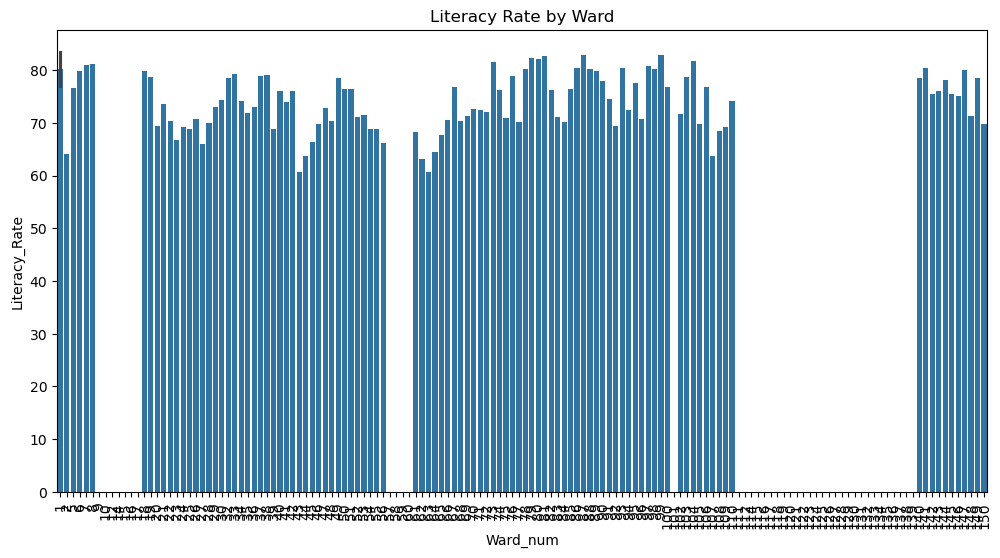

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Literacy Rate by Ward
plt.figure(figsize=(12,6))
sns.barplot(data=merged_df.sort_values('Literacy_Rate', ascending=False), x='Ward_num', y='Literacy_Rate')
plt.xticks(rotation=90)
plt.title("Literacy Rate by Ward")
plt.show()

In [153]:
# Export top 5 least literate wards
low_lit = merged_df.sort_values('Literacy_Rate').head(5)
low_lit.to_csv('least_literate_wards.csv', index=False)

In [159]:
# Fill missing values in key columns with 0
merged_df = merged_df.fillna(0).infer_objects(copy=False)

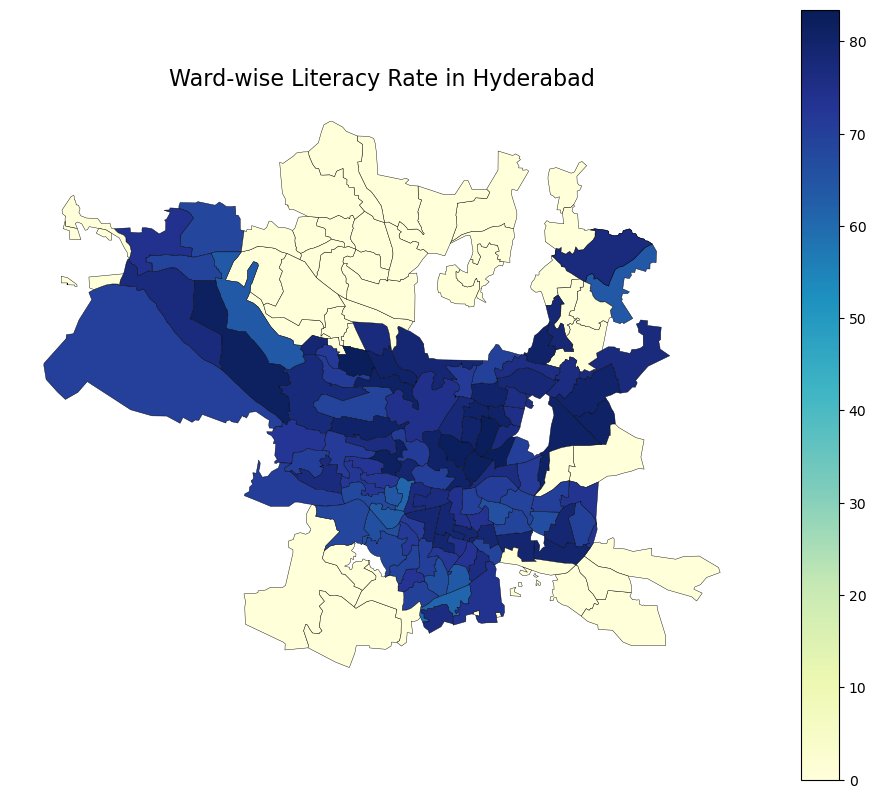

In [161]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Plot Literacy Rate
fig, ax = plt.subplots(figsize=(12, 10))
merged_df.plot(column='Literacy_Rate', cmap='YlGnBu', legend=True, edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title('Ward-wise Literacy Rate in Hyderabad', fontsize=16)
ax.axis('off')
plt.show()

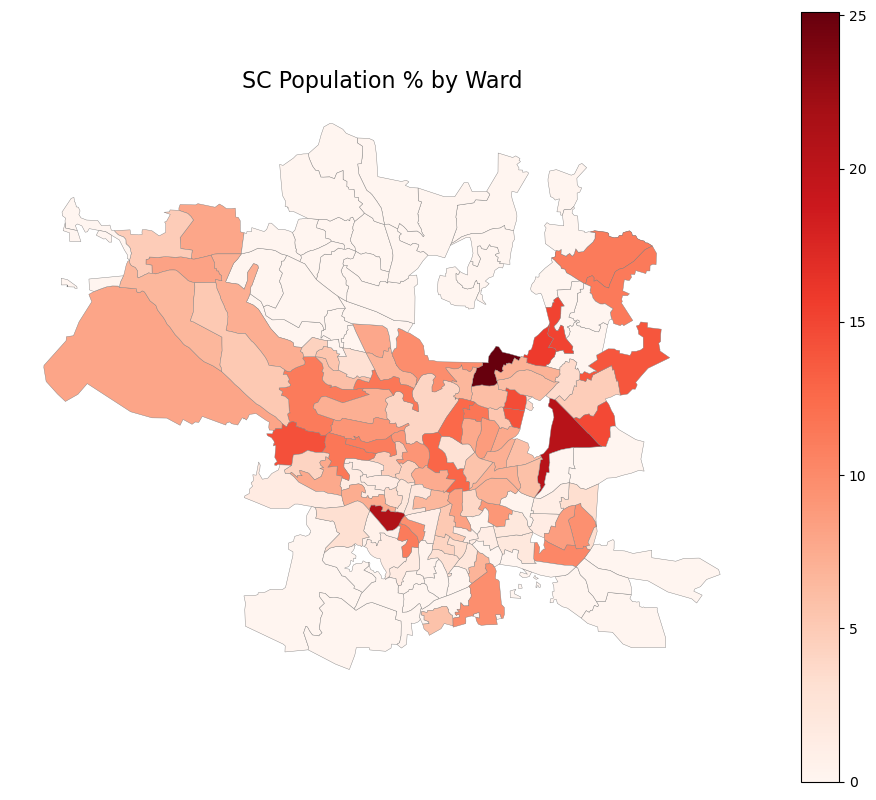

In [163]:
fig, ax = plt.subplots(figsize=(12, 10))
merged_df.plot(column='SC_Perc', cmap='Reds', legend=True, edgecolor='grey', linewidth=0.3, ax=ax)
ax.set_title('SC Population % by Ward', fontsize=16)
ax.axis('off')
plt.show()

In [169]:
merged_df['Main_Work_Ratio'] = merged_df.apply(
    lambda row: (row['MAINWORK_P'] / row['TOT_WORK_P'] * 100) if row['TOT_WORK_P'] > 0 else 0,
    axis=1
)

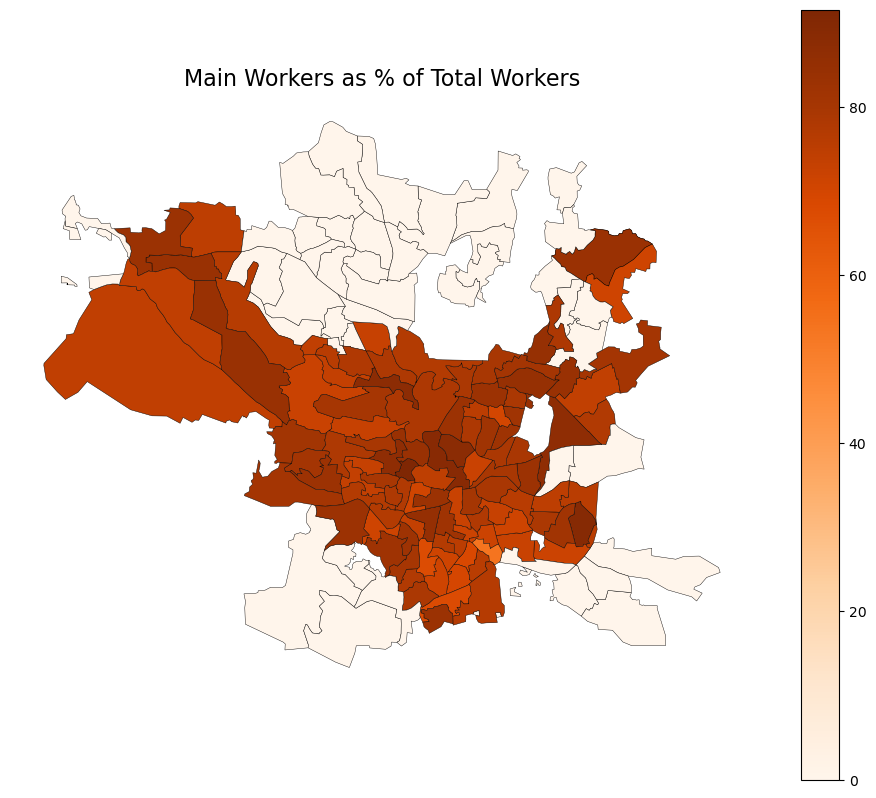

In [171]:
fig, ax = plt.subplots(figsize=(12, 10))
merged_df.plot(column='Main_Work_Ratio', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title('Main Workers as % of Total Workers', fontsize=16)
ax.axis('off')
plt.show()

In [175]:
!pip install contextily

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.4 MB 5.6 MB/s eta 0:00:05
   ---- ----------------------------------- 3.1/25.4 MB 8.8 MB/s eta 0:00:03
   ----- ---------------------------------- 3.4/25.4 MB 5.9 MB/s eta 0:00:04
   ------ --------------------------------- 4.2/25.4 MB 6.3 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/25.4 MB 5.4 MB/s eta 0:00:04
   ---------- ----------------------------- 6.8/25.4 MB 5.8 MB/s eta 0:00:04
   ----------- ---------------------------- 7.3/25.4 MB 5.3 MB/s eta 0:00:04
   ------------ --------------------------- 8.1/25.4 MB 5.1 MB/s eta 0:00:04
   -------------- ------------------------- 8.9/25.4 MB 4.9 MB/s eta 0:00:04
   -------------- ------------------------- 9.4/25.4 MB 4.8 MB/s eta 0:00:04
   ---------------- ----------------------- 10.2/25.4 MB 4.6 MB/s eta 0:00:04
   ---------------- ----------------------- 10.7/25.4 MB 4.4 MB/s eta 0:00:04
   -

In [179]:
import contextily as ctx

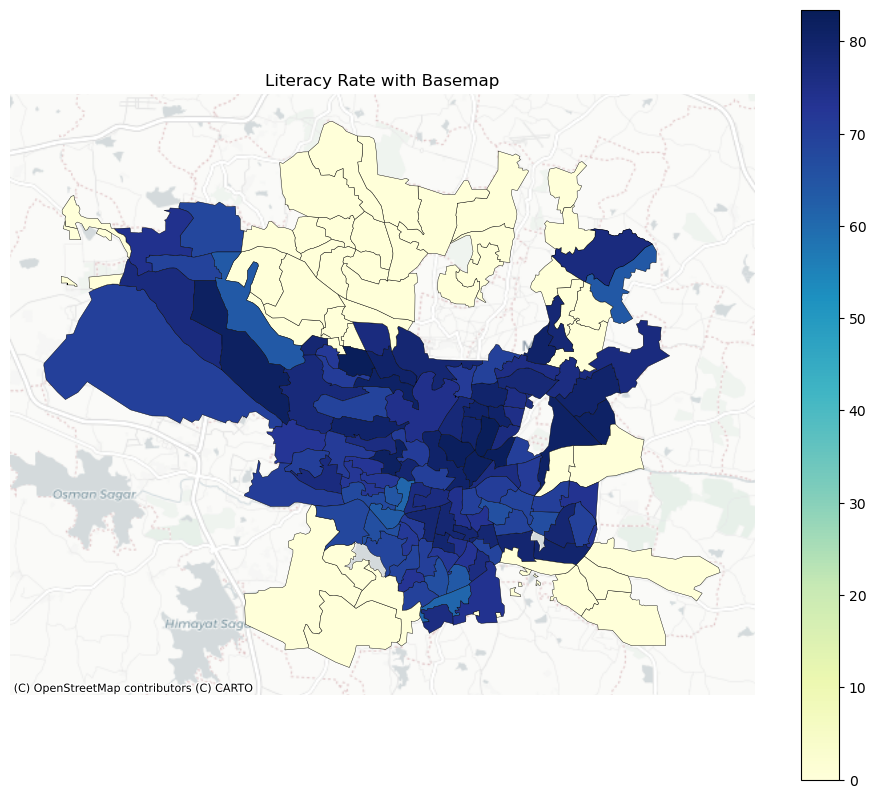

In [181]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 10))
merged_df.to_crs(epsg=3857).plot(column='Literacy_Rate', cmap='YlGnBu', legend=True, edgecolor='black', linewidth=0.3, ax=ax)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title('Literacy Rate with Basemap')
ax.axis('off')
plt.show()

                         Name  Literacy_Rate
70          Ward 63 Mangalhat      60.672251
58    Ward 43 Chandrayangutta      60.679156
131           Ward 62 Ziaguda      63.125854
35          Ward 107 Madhapur      63.728932
55           Ward 44 Uppuguda      63.793186
10    Ward 2 Dr A S Rao Nagar      64.058477
71   Ward 64 Dattatreya Nagar      64.443351
117         Ward 27 Akbarbagh      66.036765
139        Ward 56 Kishanbagh      66.240995
56          Ward 45 Jangammet      66.291989


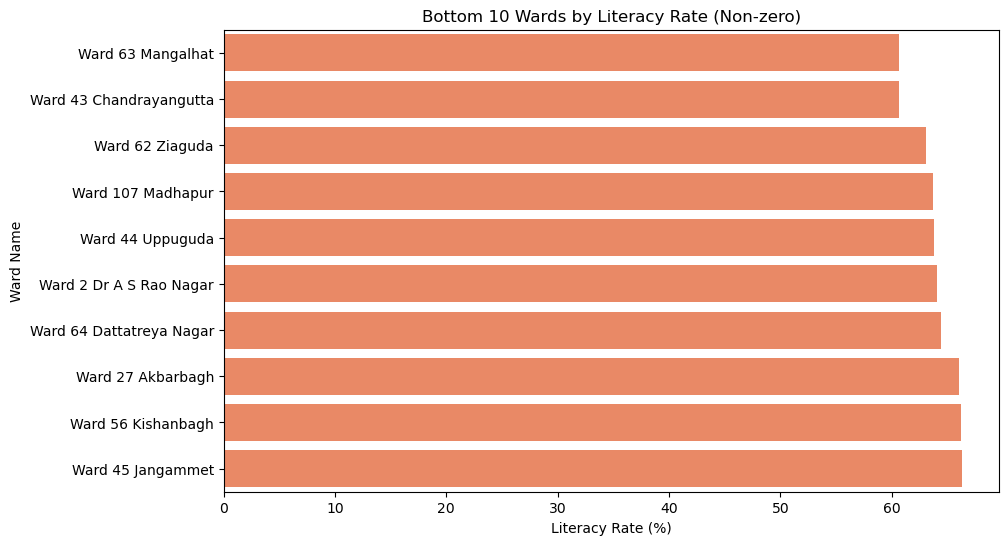

In [189]:
least_lit_nonzero = merged_df[merged_df['Literacy_Rate'] > 0].nsmallest(10, 'Literacy_Rate')

print(least_lit_nonzero[['Name', 'Literacy_Rate']])

plt.figure(figsize=(10, 6))
sns.barplot(data=least_lit_nonzero, x='Literacy_Rate', y='Name', color='coral')
plt.title('Bottom 10 Wards by Literacy Rate (Non-zero)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Ward Name')
plt.show()


## 🧠 Summary & Interpretation

- **SC Population Hotspots**: Some wards show higher Scheduled Caste % than others, indicating spatial inequality.
- **Data Gaps**: Not all wards have matched data — better integration with Census boundary mapping is needed.
- **Next Steps**:
  - Add OpenStreetMap data to visualize healthcare and education access.
  - Use proximity analysis to identify service gaps.
  - Overlay slum data or BPL housing to further the inequality analysis.

---

This notebook is a prototype and can be extended into a full urban planning research tool.